In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving User_Data.csv to User_Data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
insurance = pd.read_csv('User_Data.csv')
insurance.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# since User ID is not important we dropped it
insurance.drop(['User ID'],axis = 'columns', inplace =True)
insurance.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
insurance.shape

(400, 4)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
from sklearn import metrics # Module for evaluation
from sklearn.model_selection import train_test_split # Module for splitting data

In [ ]:
X = insurance.drop(['Purchased'],axis ='columns')
y = insurance['Purchased']

In [ ]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [ ]:
pd.get_dummies(insurance['Gender'])

,Female,Male
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True
...,...,...
395,True,False
396,False,True
397,True,False
398,False,True


In [ ]:
X = pd.get_dummies(X)
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,False,True
1,35,20000,False,True
2,26,43000,True,False
3,27,57000,True,False
4,19,76000,False,True


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [ ]:
# encoder = OneHotEncoder()
# encoded = encoder.fit_transform(X[['Gender']])
# encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 400 stored elements and shape (400, 2)>

In [ ]:
# encoded_df = pd.DataFrame(encoded.toarray(), columns = encoder.categories_)
# encoded_df

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
395,1.0,0.0
396,0.0,1.0
397,1.0,0.0
398,0.0,1.0


In [ ]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,False,True
1,35,20000,False,True
2,26,43000,True,False
3,27,57000,True,False
4,19,76000,False,True


In [ ]:
# X = pd.concat([X,encoded_df],axis = 'columns')
# X.columns = X.columns.astype(str)
# X.head()

,Age,EstimatedSalary,"('Female',)","('Male',)","('Female',)","('Male',)"
0,19,19000,0.0,1.0,0.0,1.0
1,35,20000,0.0,1.0,0.0,1.0
2,26,43000,1.0,0.0,1.0,0.0
3,27,57000,1.0,0.0,1.0,0.0
4,19,76000,0.0,1.0,0.0,1.0


In [ ]:
X

In [ ]:
# X.drop(['Gender'],axis = 'columns', inplace = True)
# X.head()

,Age,EstimatedSalary,"(Female,)","(Male,)"
0,19,19000,0.0,1.0
1,35,20000,0.0,1.0
2,26,43000,1.0,0.0
3,27,57000,1.0,0.0
4,19,76000,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_prediction = logisticmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,logistic_prediction)

0.8875

In [ ]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

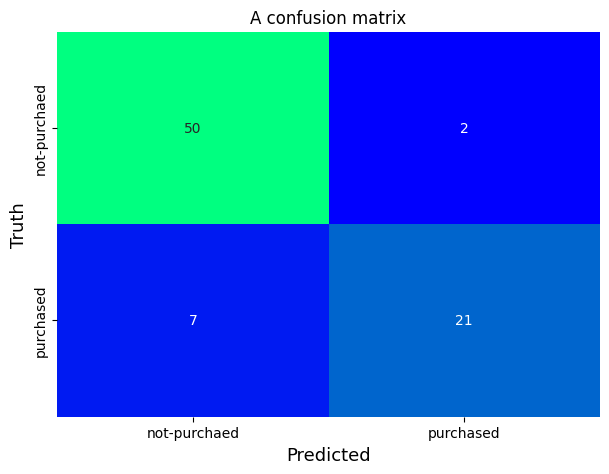

In [ ]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

In [ ]:
print(metrics.classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [ ]:
# from sklearn.metrics import f1_score
# print(f1_score(y_test,rf_prediction))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel =RandomForestClassifier(n_estimators = 250)
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [ ]:
rfc_prediction = randomforestmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, rfc_prediction)

0.9125

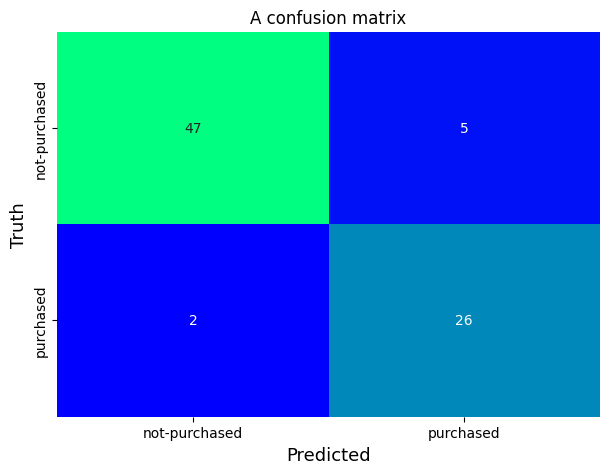

In [ ]:
ConfusionMatrix(y_test, rfc_prediction, label = ['not-purchased', 'purchased'])

In [ ]:
print(metrics.classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [ ]:
print(f1_score(y_test, rfc_prediction))

0.8620689655172413


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy')

In [ ]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.8375

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        52
           1       0.76      0.79      0.77        28

    accuracy                           0.84        80
   macro avg       0.82      0.83      0.82        80
weighted avg       0.84      0.84      0.84        80



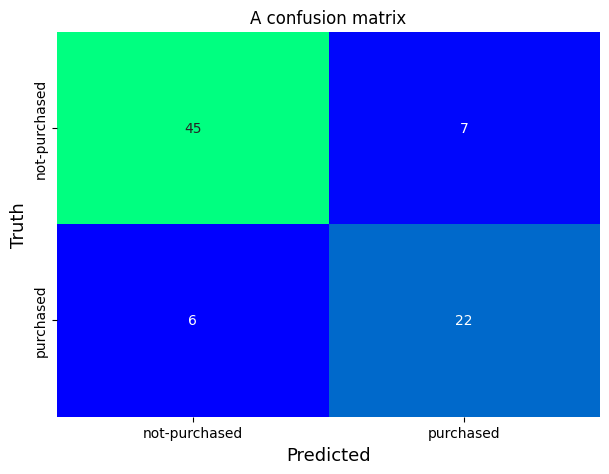

In [ ]:
ConfusionMatrix(y_test, y_pred, label = ['not-purchased', 'purchased'])

In [ ]:
import pickle
pickle_out = open('rfmodel.pkl', mode = 'wb')
pickle.dump(randomforestmodel, pickle_out)
pickle_out.close()

In [ ]:
import pickle
pkOut = open('dtmodel.pkl',mode='wb')
pickle.dump(DT,pkOut)
pkOut.close()

In [ ]:
pickle_in = open('rfmodel.pkl', 'rb')
clf = pickle.load(pickle_in)

In [ ]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import pickle
import streamlit as st
pickle_in = open('rfmodel.pkl', 'rb')
clf = pickle.load(pickle_in)

@st.cache()


def make_prediction(Age,EstSalary,Gender):
  if Gender == "Male":
    GenderM = 1
    GenderF = 0
  elif Gender == "Female":
    GenderM = 0
    GenderF = 1

  prediction = clf.predict([[Age, EstSalary, GenderF, GenderM]])[0]

  if prediction == 0:
    value = "not to purchase"
  else:
    value = "to purchase"
  return value

def main():
    #front end elements
    html_temp = """
    <div style ="background-color:green;padding:13px">
    <h1 style ="color:white;text-align:center;">SUNPAUL' Insurance Prediction</h1>
    </div>
    """

    #front end
    #st.markdown ('![](logo2.png)')
    st.markdown(html_temp, unsafe_allow_html = True)

    # following lines create boxes in which user can enter data required to make prediction
    Age = st.number_input('Enter the Age')
    EstSalary = st.number_input('Enter Estimated Salary')
    Gender = st.selectbox('Gender',("Male","Female"))
    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Make Prediction"):
        result = make_prediction(Age, EstSalary, Gender)
        st.success(f'This customer is likely {result}')
        print("Just test")

if __name__=='__main__':
  main()

Writing app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.13.153.253:8501

